###  PIMA INDIANS DIABETES DATASET

The Pima Indian Diabetes Dataset, originally from the National Institute of Diabetes and Digestive and Kidney Diseases, contains information of 768 women from a population near Phoenix, Arizona, USA. The outcome tested was Diabetes, 258 tested positive and 500 tested negative. Therefore, there is one target (dependent) variable and the following attributes (TYNECKI, 2018):


	Pregnancies (number of times pregnant),

	Oral glucose tolerance test - OGTT (two hour plasma glucose concentration after 75g anhydrous glucose in mg/dl),

	Blood Pressure (Diastolic Blood Pressure in mmHg),

	Skin Thickness (Triceps skin fold thickness in mm),

	Insulin (2 h serum insulin in mu U/ml),

	BMI (Body Mass Index in kg/m<sup>2</sup>),

	Age (years),

	Pedigree Diabetes Function ('function that represents how likely they are to get the disease by extrapolating from their ancestor’s history')

### PIMA INDIANS AND DIABETES

Pima are descendants of people that inhabited the Sonoran desert and Sierra Madre areas for centuries. Around 300 B.C. they moved to Gila River Valley at the time  in Mexico, but region that was acquired by the United States in 1853. A Pima reservation was created in Arizona in 1959 and they adapted to their desert homeland by directing water to support a subsistence agriculture. Around 1900 the number of population of white settlers increased and a diversion of the water happened. That had an impact of Pima's food intake and way of life. Pima Indians used to farm sustained through physical labour to a little labour and scarce of food. As a consequence they food intake became high in fat and their lifestyle was mainly sedentary. That resulted in development of diabetes among the Arizona Pimas, and it drawed attention as they had the highest recorded prevalence and incidence of type 2 diabetes (T2DM) of any geographically-defined population (SCHULZ et al, 2015).
The Pima population has been under study by the National Institute of Diabetes and Digestive and Kidney Diseases at intervals of 2 years since 1965. As epidemiological evidence indicates that T2DM results from interaction of genetic and environmental factors, the Pima Indians Diabetes Dataset includes information about attributes that could and should be related to the onset of diabetes and its future complications.

Obesity, assessed by Body Mass Index (BMI), is intimately associated with diabetes and its impact on the development of T2DM has been largely described in large cohort prospective studies (VAN GAAL and SCHEEN, 2015; WILDING, 2014; RUIZ-ALEJOS et al, 2020). In fact, most of the individuals with T2DM are overweight or obese <sup>5</sup>.  Despite the link between obesity and T2DM not all obese develops diabetes and not all diabetics are obese people. Diabetic lean people probably have a stronger genetic component for T2DM than overweight and obese individuals (WILDING, 2014).
Accordingly to Ruiz-Alejos and col (2020) 'there is no specific recommendation about the use of an anthropometric measurement as a marker for T2DM risk prediction besides BMI and waist circumference'. Unfortunately the waist circumference is a measurement not included in the Pima Indians Diabetes Dataset.
BMI provides a simple, yet accurate method for indicating nutritional status in adults (as it can be seem in the Table below), and it can be calculated by dividing the individual's weight (in kg) by the square of their height (in metres).
<img src="https://i.ibb.co/647ZL2X/bmi.png" alt="bmi" border="0">

<img src="https://i.ibb.co/HTqTfdr/WHO-Europe-Nutrition-Body-mass-index-BMI.png" alt="WHO-Europe-Nutrition-Body-mass-index-BMI" border="0">
Table. Nutritional Status. Source: World Health Organization.

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
data_path = "/content/drive/MyDrive/0.Latest_DS_Course/SL/LogisticRegression/Data/pima-indians-diabetes.data"

In [78]:

# Step 1: Load the dataset
df = pd.read_csv(data_path, names= ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DPF', 'Age','class'])

In [79]:

# Step 2: Data Inspection
df.head()  # View the first few rows



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [80]:
df.info() # Get dataset structure and missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   DPF            768 non-null    float64
 7   Age            768 non-null    int64  
 8   class          768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [81]:
df.describe()  # Get summary statistics

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [82]:

# Step 3: Data Cleaning
# Checking for missing values
print(df.isnull().sum())

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
class            0
dtype: int64


In [83]:
# Checking for zero values in certain columns that shouldn't have zeroes
def check_zero_values(df, cols):
    for col in cols:
        print(f"{col}: {df[df[col] == 0].shape[0]} zero values")

check_zero_values(df, ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'])

Glucose: 5 zero values
BloodPressure: 35 zero values
SkinThickness: 227 zero values
Insulin: 374 zero values
BMI: 11 zero values


In [84]:
# Replace zero values with NaN where applicable
def replace_zeros_with_nan(df, cols):
    for col in cols:
        df[col] = df[col].replace(0, np.nan)  # Direct column assignment

replace_zeros_with_nan(df, ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'])


In [85]:
# Fill missing values with median
df.fillna(df.median(), inplace=True)

In [86]:

# Step 4: Data Description
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# **UNIVARIATE ANALYSIS**

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

def histogram_boxplot(df, column):
    """Creates a side-by-side histogram and boxplot for a given column."""
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

    # Histogram
    sns.histplot(df[column], bins=20, kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {column}')
    axes[0].set_xlabel(column)

    # Boxplot
    sns.boxplot(x=df[column], ax=axes[1])
    axes[1].set_title(f'Boxplot of {column}')

    plt.tight_layout()
    plt.show()

    print(df[column].describe())



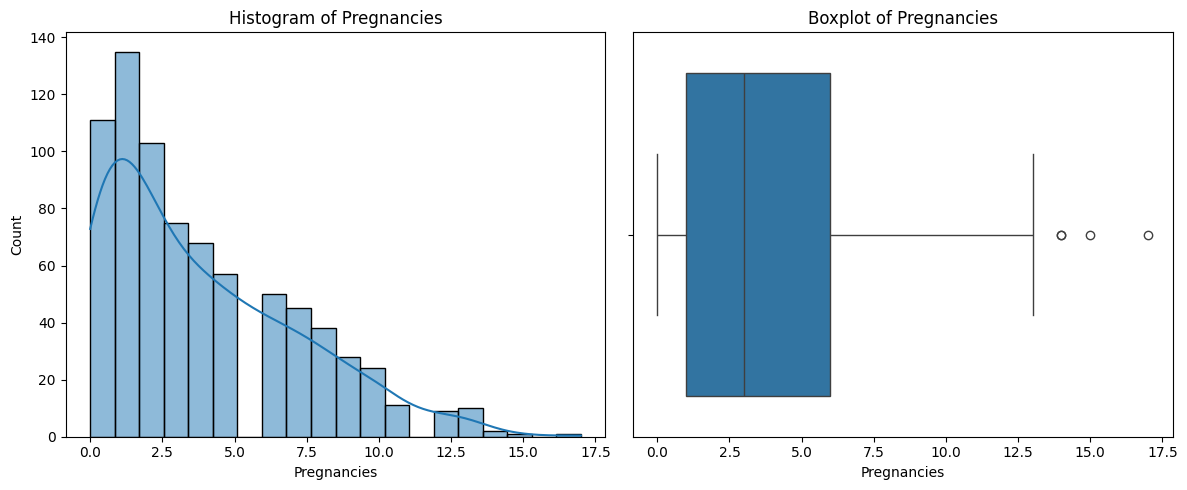

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64


In [88]:
histogram_boxplot(df, 'Pregnancies')


observations based on the plots:

1. **Histogram Insights**:
   - The distribution of pregnancies is right-skewed, with most values concentrated between 0 and 5 pregnancies.
   - The peak in the histogram occurs near 2.5 pregnancies.
   - A density curve overlay suggests smooth trends in probability density.

2. **Boxplot Insights**:
   - Median pregnancies are approximately 3, and the interquartile range spans from 1 to 6 pregnancies.
   - Outliers are visible beyond 12.5 pregnancies, indicating a few extreme cases.


In [89]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DPF', 'Age', 'class'],
      dtype='object')

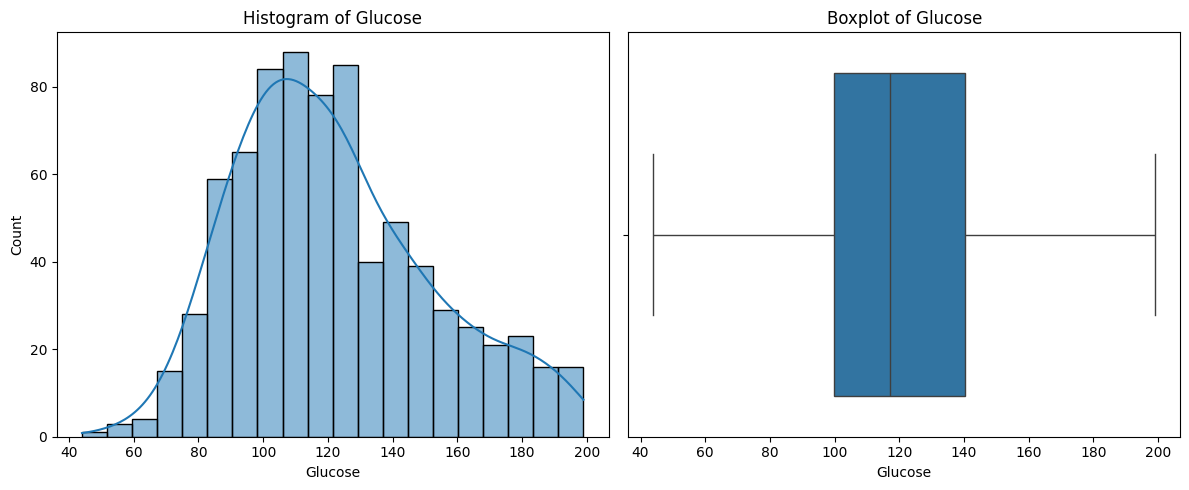

count    768.000000
mean     121.656250
std       30.438286
min       44.000000
25%       99.750000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64


In [90]:
histogram_boxplot(df, 'Glucose')


observations from the  plots:

### **Histogram Observations**:
1. The distribution of glucose levels appears approximately normal, with the highest frequency observed around the 100–120 range.
2. Glucose levels predominantly fall between 90 and 140, representing the majority of occurrences.
3. The density curve indicates a smooth, symmetric pattern, aligning with the shape of the histogram bars.

### **Boxplot Observations**:
1. The median glucose level is approximately 110–120, providing a central tendency measure.
2. The interquartile range (IQR) spans from around 90 to 140, indicating the middle 50% of the data.
3. The whiskers extend to the minimum and maximum glucose levels within the range, with no clear outliers present.


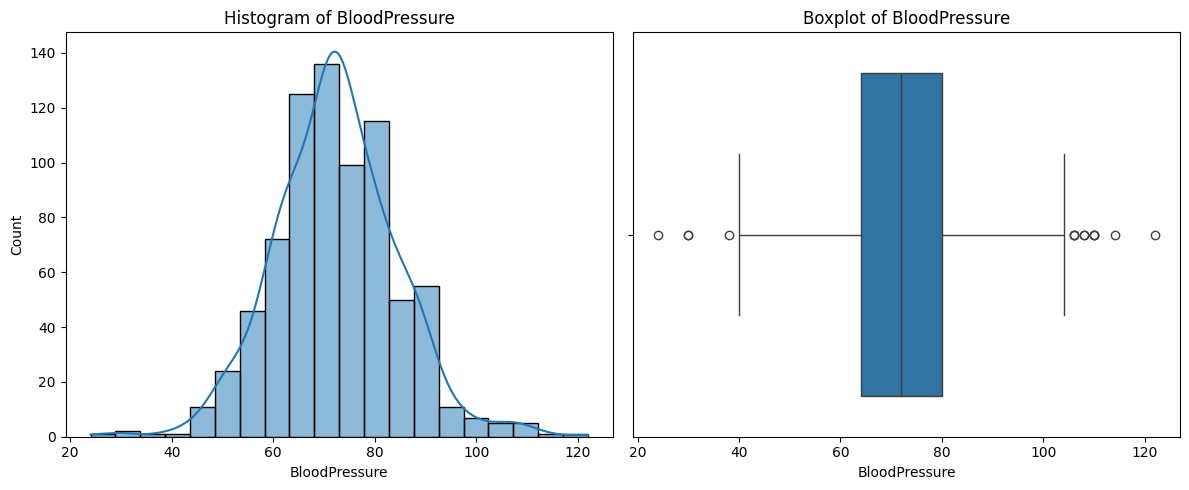

count    768.000000
mean      72.386719
std       12.096642
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64


In [91]:
histogram_boxplot(df, 'BloodPressure')


Observations:
1. **Histogram Insights**:
   - Blood pressure values show a roughly normal distribution, peaking around 80.
   - Most measurements fall within 70 to 90.
   - Outliers exist below 40 and above 100.

2. **Boxplot Highlights**:
   - Median blood pressure is approximately 80.
   - Interquartile range spans 70 to 90, capturing the central 50% of values.
   - Outliers on both ends suggest rare extreme measurements.



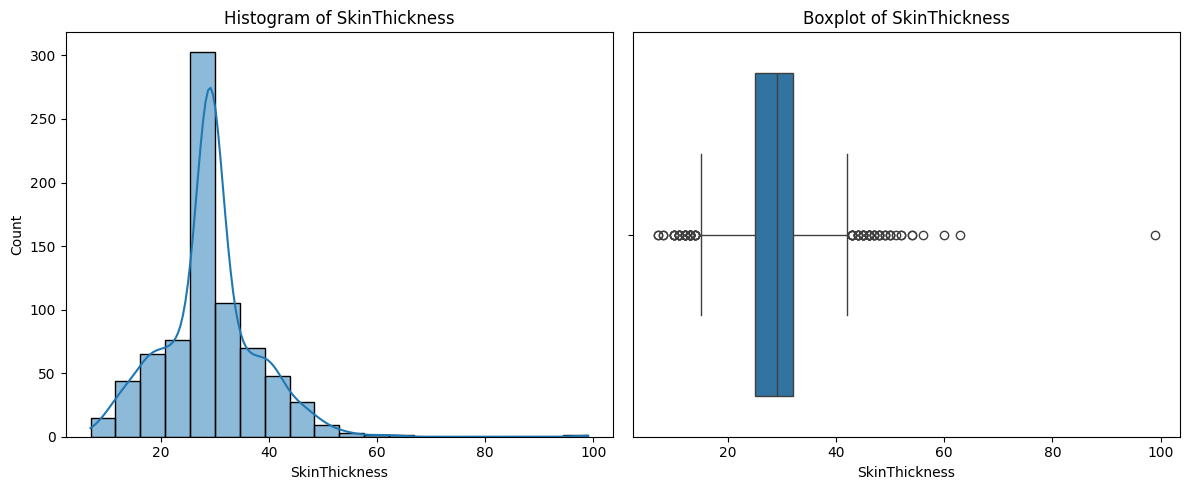

count    768.000000
mean      29.108073
std        8.791221
min        7.000000
25%       25.000000
50%       29.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64


In [92]:
histogram_boxplot(df, 'SkinThickness')


Here are the observations:

1. **Histogram Insights**:
   - The distribution of SkinThickness shows a concentration between 20 and 40, with a peak around 30.
   - A density curve overlay indicates a right-skewed distribution, suggesting a gradual decline in frequency as SkinThickness values increase.

2. **Boxplot Highlights**:
   - Median SkinThickness is approximately 30, and the interquartile range (IQR) spans from around 20 to 40.
   - The whiskers extend from 10 to 50, capturing most of the data within this range.
   - Outliers exist above 50, reflecting rare extreme values in the dataset.


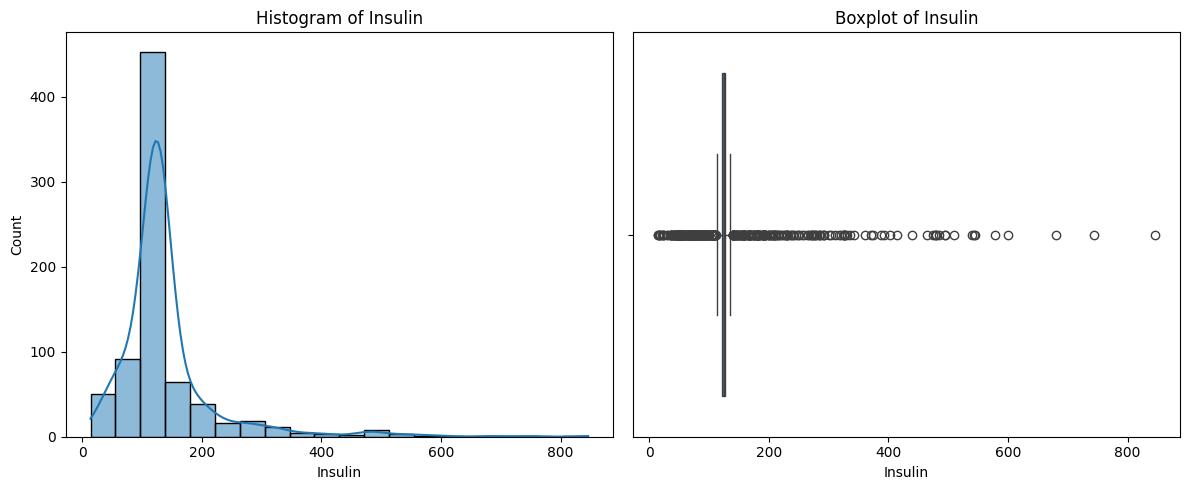

count    768.000000
mean     140.671875
std       86.383060
min       14.000000
25%      121.500000
50%      125.000000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64


In [93]:
histogram_boxplot(df, 'Insulin')


Here are observations -
1. **Histogram Observations**:
   - The insulin levels display a right-skewed distribution, with most values concentrated below 200.
   - A prominent peak is visible around the 100–200 range, representing the mode of the dataset.
   - The density curve overlay highlights a gradual decline in frequency as insulin levels increase.
   - Outliers beyond 500 signify rare, extreme instances of insulin levels.

2. **Boxplot Observations**:
   - The median insulin level is approximately 100, indicating the central value of the data.
   - The interquartile range (IQR) spans from about 75 to 150, showing moderate variability within the dataset.
   - Numerous outliers are observed above the upper whisker, with values exceeding 200.
   - The presence of these outliers suggests high variability or measurement anomalies in the insulin levels.


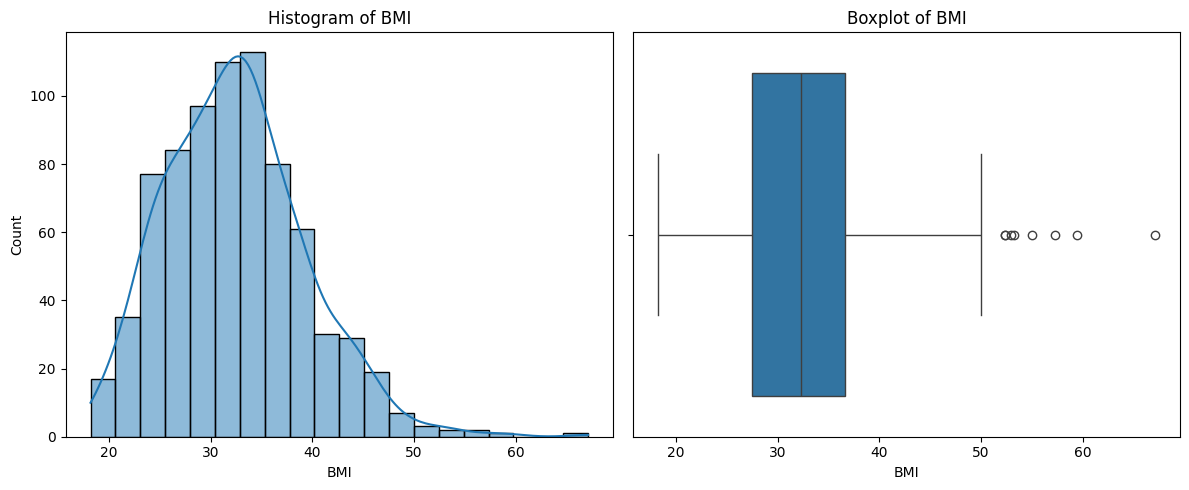

count    768.000000
mean      32.455208
std        6.875177
min       18.200000
25%       27.500000
50%       32.300000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64


In [94]:
histogram_boxplot(df, 'BMI')


Here are the observations based on the BMI plots:

1. **Histogram Observations**:
   - The BMI distribution is right-skewed, with most values concentrated between 20 and 40.
   - The peak frequency occurs around a BMI of 30, where the count exceeds 100.
   - A density curve indicates a gradual decline in frequency as BMI values increase, aligning with the skewed pattern.

2. **Boxplot Observations**:
   - The median BMI is approximately 30, representing the central tendency.
   - The interquartile range (IQR) spans from 25 to 35, capturing the middle 50% of the data.
   - Outliers are present above the upper whisker, with BMI values exceeding 50, suggesting rare extreme cases.


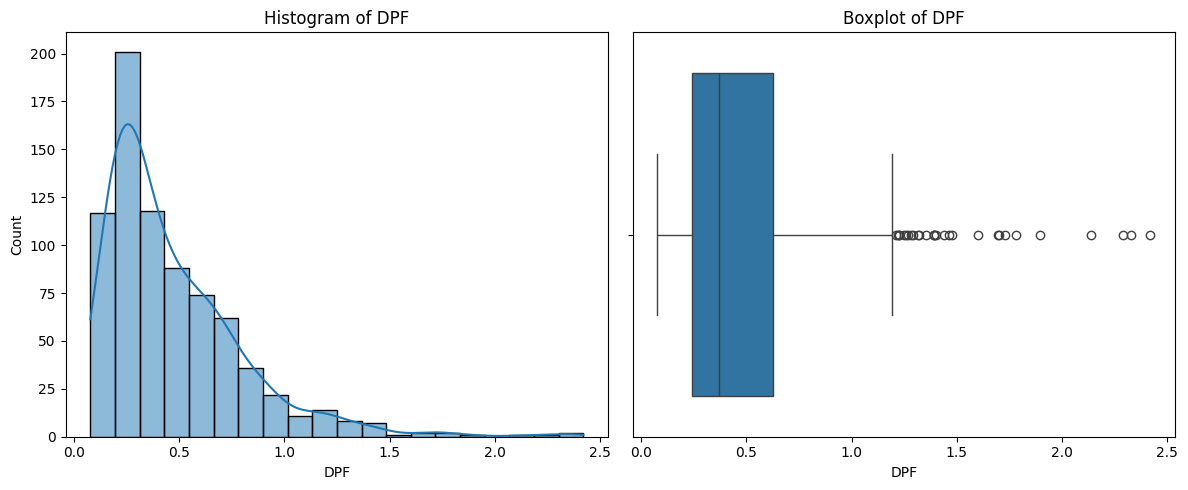

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DPF, dtype: float64


In [95]:
histogram_boxplot(df, 'DPF')


Here are the observations based on the DPF plots:

1. **Histogram Observations**:
   - The DPF distribution is right-skewed, with most values concentrated between 0 and 1.
   - The peak is around 0.25, representing the mode of the distribution.
   - A gradual decline in frequency is observed as DPF values increase beyond 0.5.

2. **Boxplot Observations**:
   - The median DPF value is approximately 0.5, reflecting the central tendency.
   - The interquartile range spans from about 0.25 to 0.75, capturing the middle 50% of values.
   - Outliers are present beyond the upper whisker (around 1.5), indicating rare, extreme values.


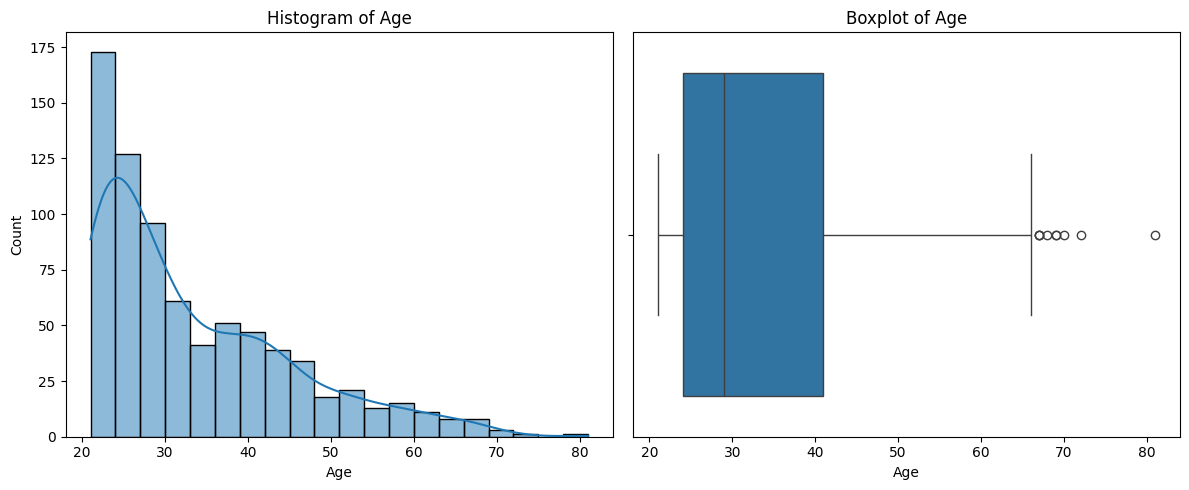

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64


In [96]:
histogram_boxplot(df, 'Age')


Here are the observations based on the age distribution plots:

1. **Histogram Observations**:
   - The majority of individuals fall within the age range of 20 to 30, indicating a younger population dominance.
   - A noticeable peak occurs around age 25, which represents the mode of the distribution.
   - The frequency steadily decreases as age increases, with fewer individuals above the age of 40.

2. **Boxplot Observations**:
   - The median age is approximately 30, showing the central tendency of the dataset.
   - The interquartile range (IQR) lies between 25 and 40, capturing the middle 50% of the data.
   - Outliers are present beyond the upper whisker, representing individuals aged above 70, which are rare in the dataset.


# **BIVARIATE ANALYSIS**

In [97]:


def plot_boxplot(df, column, target='class'):
    """
    Creates a boxplot for a numerical column against the target column.

    Parameters:
        df (pd.DataFrame): The dataset.
        column (str): The numerical column to plot.
        target (str): The categorical column (default is 'class').
    """
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[target], y=df[column])
    plt.title(f"Boxplot of {column} vs {target}")
    plt.xlabel(target)
    plt.ylabel(column)
    plt.show()



In [98]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DPF', 'Age', 'class'],
      dtype='object')

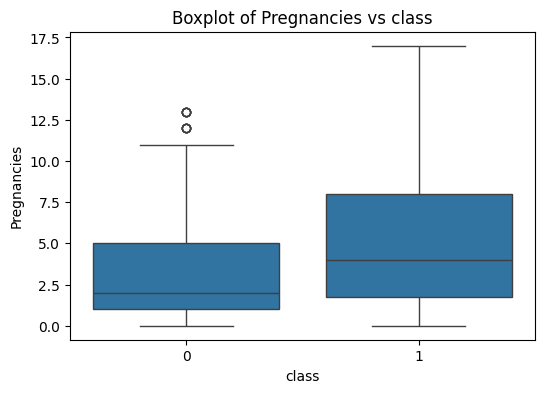

In [99]:
plot_boxplot(df, 'Pregnancies')

### **Observations from the Boxplot (Pregnancies vs Class)**  

1. **Higher pregnancies in diabetic patients (class 1)** → The median number of pregnancies is higher for individuals with diabetes compared to non-diabetic individuals.  

2. **Greater spread for diabetic patients** → The interquartile range (IQR) is wider for class 1, indicating more variation in pregnancies among diabetic individuals.  

3. **Outliers in non-diabetic class (class 0)** → A few non-diabetic individuals have a significantly higher number of pregnancies, but they are exceptions.  

4. **Overlap exists** → While diabetic individuals generally have more pregnancies, there is still a substantial overlap between the two groups, meaning pregnancies alone is not a definitive predictor of diabetes.  

### **Key Takeaway:**  
Pregnancies show a positive correlation with diabetes risk, but other factors must be considered for accurate classification.

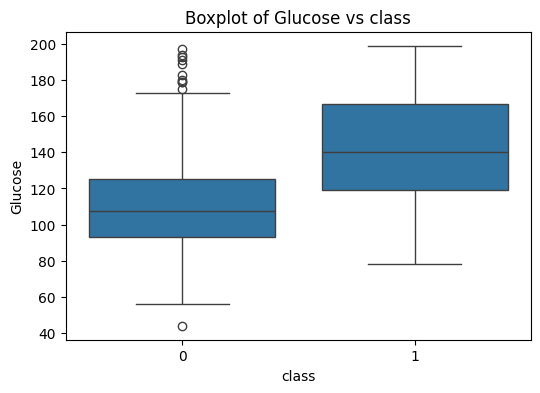

In [100]:
plot_boxplot(df, 'Glucose')


### **Observations from the Boxplot of Glucose vs Class:**

1. **Higher Glucose Levels in Diabetic Patients (Class = 1)**  
   - The median glucose level for diabetic patients (Class 1) is **significantly higher** than for non-diabetic individuals (Class 0).  
   - Most diabetic individuals have glucose levels **above 120**, while non-diabetic individuals have a lower median.

2. **Greater Spread in Diabetic Group**  
   - The interquartile range (IQR) for the diabetic group (Class 1) is **wider**, indicating a higher variation in glucose levels.
   - This suggests that glucose levels in diabetics fluctuate more compared to non-diabetics.

3. **Outliers in the Non-Diabetic Group (Class = 0)**  
   - There are **several outliers** in the non-diabetic group with glucose levels exceeding **160**, which might indicate **misclassified cases** or potential prediabetes cases.

4. **Overlap in Glucose Ranges**  
   - Although diabetics generally have higher glucose levels, there is **some overlap** between the two groups.
   - Some non-diabetic individuals show glucose levels similar to diabetics, and vice versa.

5. **Possible Diagnostic Threshold**  
   - The separation between the two groups suggests that glucose level **above ~125 mg/dL** could be a threshold for diabetes detection.


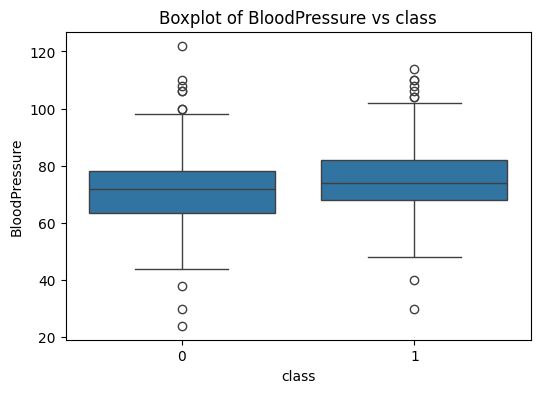

In [101]:
plot_boxplot(df, 'BloodPressure')


### **Observations from the Boxplot of Blood Pressure vs Class:**

1. **Similar Median Blood Pressure for Both Classes**  
   - The median blood pressure values for **diabetic (Class 1) and non-diabetic (Class 0) individuals** are almost the same, around **70-80 mmHg**.

2. **Slightly Higher IQR in Diabetic Individuals**  
   - The interquartile range (IQR) for diabetics is **slightly wider**, indicating a bit more variation in blood pressure values.

3. **Presence of Outliers in Both Groups**  
   - Both classes have **outliers on the lower end (~20-40 mmHg) and higher end (~100-120 mmHg)**.
   - Some non-diabetic individuals have **very low blood pressure** (<40), which could indicate measurement errors or unique cases.

4. **No Strong Differentiation Between Classes**  
   - Unlike glucose levels, **blood pressure alone does not strongly differentiate diabetic and non-diabetic individuals**.


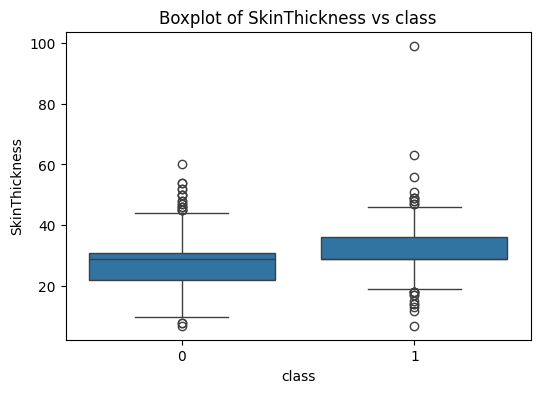

In [102]:
plot_boxplot(df, 'SkinThickness')


### **Observations from the Boxplot of Skin Thickness vs Class:**  

1. **Similar Median Skin Thickness for Both Classes**  
   - The median values for **diabetic (Class 1) and non-diabetic (Class 0) individuals** are quite close, around **25-30 mm**.

2. **Higher Skin Thickness in Diabetic Individuals**  
   - The **upper quartile is slightly higher for diabetics**, indicating that some diabetic individuals tend to have greater skinfold thickness.

3. **Presence of Outliers in Both Classes**  
   - There are **several outliers** in both groups, especially values **above 50 mm**.  
   - A significant **extreme outlier (~100 mm)** is present in the diabetic group, which may indicate **data entry errors or rare cases**.

4. **No Strong Differentiation Between Classes**  
   - Like blood pressure, **skinfold thickness alone does not show a clear separation** between diabetic and non-diabetic individuals.


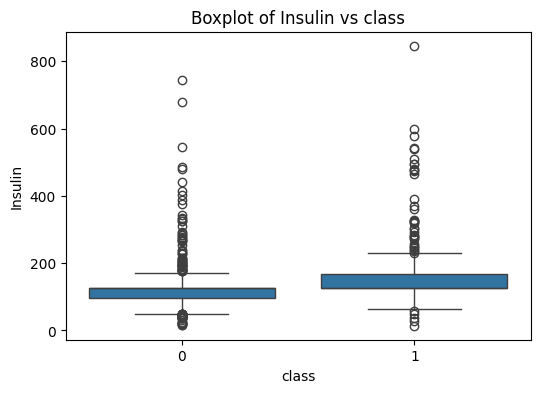

In [103]:
plot_boxplot(df, 'Insulin')


### **Observations from the Boxplot of Insulin vs Class:**  

1. **Higher Median Insulin in Diabetics**  
   - The median **Insulin** level is higher in diabetics (Class 1) compared to non-diabetics (Class 0).  

2. **Greater Variability in Diabetics**  
   - The interquartile range (IQR) is wider for diabetics, indicating **greater dispersion** in insulin levels.  

3. **Numerous Outliers in Both Groups**  
   - Both groups have a **high number of outliers**, suggesting extreme insulin values in some individuals.  

4. **Higher Insulin Spikes in Diabetics**  
   - Some diabetic cases have insulin levels exceeding **800**, indicating potential **insulin resistance**.  


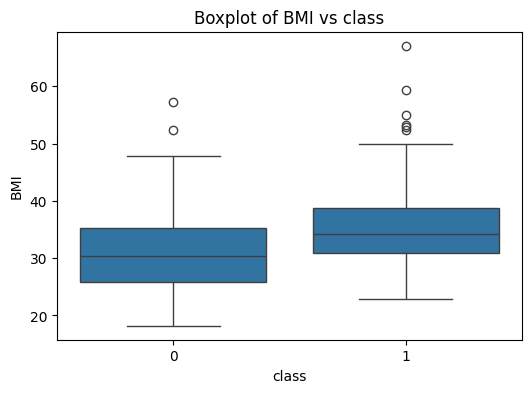

In [104]:
plot_boxplot(df, 'BMI')


### **Observations from the Boxplot of BMI vs Class:**  

1. **Higher Median BMI in Diabetics**  
   - The median **BMI** is higher for diabetics (Class 1) than non-diabetics (Class 0), indicating a possible link between higher BMI and diabetes.  

2. **Wider BMI Range in Diabetics**  
   - The **interquartile range (IQR)** is slightly larger for diabetics, suggesting greater variability in BMI values.  

3. **More Extreme Outliers in Diabetics**  
   - Diabetic individuals show more extreme BMI values **above 50**, indicating a higher prevalence of obesity in this group.  

4. **Obesity as a Risk Factor**  
   - The distribution suggests that **higher BMI is associated with diabetes risk**, reinforcing obesity as a contributing factor.  


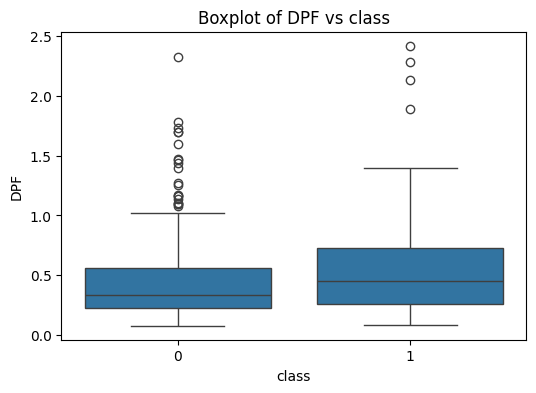

In [105]:
plot_boxplot(df, 'DPF')


### **Observations from the Boxplot of DPF vs Class:**  

1. **Higher Median DPF in Diabetics**  
   - The median **Diabetes Pedigree Function (DPF)** is slightly higher in diabetic individuals (Class 1) compared to non-diabetics (Class 0).  

2. **Greater Spread in Diabetics**  
   - Diabetic individuals show a **wider interquartile range (IQR)** and more variability in DPF values.  

3. **More Extreme Outliers in Both Groups**  
   - Both classes have several **high DPF outliers**, but diabetics tend to have **higher extreme values** (above 2.0).  

4. **Possible Influence of Genetic Factors**  
   - Since DPF represents genetic risk, the higher median and wider spread in diabetics suggest **heredity may play a role in diabetes risk**.  


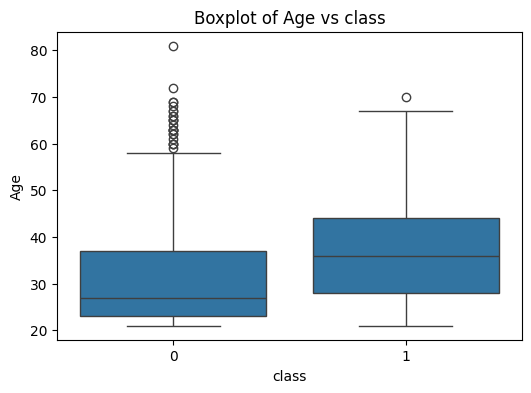

In [106]:
plot_boxplot(df, 'Age')

### **Observations from the Boxplot of Age vs Class:**  

1. **Diabetic Individuals Tend to Be Older**  
   - The **median age of diabetic individuals (Class 1) is higher** than that of non-diabetic individuals (Class 0).  
   - Most non-diabetic individuals are **between 22-35 years old**, while diabetics are **between 30-45 years old**.

2. **Wider Age Distribution for Diabetics**  
   - The **age range for diabetics is broader**, with some individuals reaching up to **70 years**.  
   - Non-diabetic individuals have more **outliers in the higher age range (above 60 years)**.

3. **Presence of Outliers in Both Groups**  
   - Non-diabetics have **several outliers above 60 years**, while diabetics have **fewer outliers**.  
   - The maximum age in both groups is relatively close.

4. **Age is a Key Factor in Diabetes**  
   - Since diabetics tend to be older, **age appears to be an important factor in diabetes risk**.  
   - This aligns with medical findings that **older individuals are at higher risk of diabetes**.


In [107]:
# Step 7: Multivariate Analysis (Pairplot)
sns.pairplot(df, hue='class')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

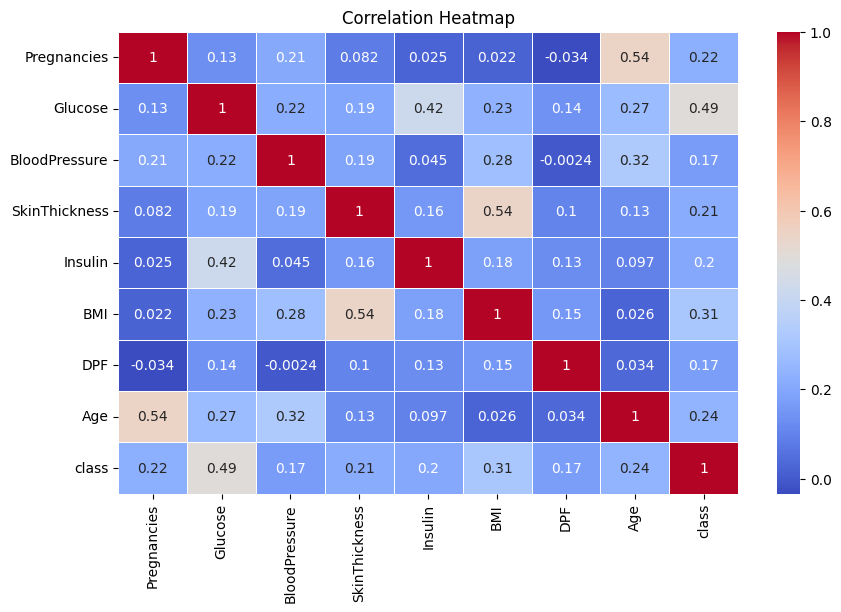

In [108]:
# Step 8: Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### **Observations from the Correlation Heatmap**  

1. **Glucose has the highest correlation with the class label (0.49)** → This suggests that glucose levels are strongly associated with the target class (diabetes presence).  

2. **BMI is moderately correlated with class (0.31)** → Higher BMI values tend to be linked with a higher likelihood of diabetes.  

3. **Age (0.24) and Pregnancies (0.22) have moderate correlations with class** → Older individuals and those with more pregnancies are slightly more likely to be diabetic.  

4. **Blood Pressure, Skin Thickness, and Insulin have weak correlations with class (~0.17-0.21)** → These features contribute to diabetes risk but are less predictive than glucose and BMI.  

5. **Strong correlations among independent variables:**  
   - **SkinThickness & BMI (0.54)** → People with higher BMI tend to have higher skin thickness.  
   - **Glucose & Insulin (0.42)** → Higher glucose levels are linked with higher insulin levels.  
   - **Age & Pregnancies (0.54)** → Older individuals tend to have had more pregnancies.  

6. **Very weak or near-zero correlations:**  
   - **Diabetes Pedigree Function (DPF) has low correlation with class (0.17)**  
   - **Blood Pressure has weak associations with all variables**  

### **Key Takeaway:**  
Glucose, BMI, Age, and Pregnancies are the most relevant predictors for diabetes in this dataset. Features like Blood Pressure and DPF contribute less to the classification.

In [109]:

# Step 9: Build Logistic Regression Model
X = df.drop(columns=['class'])
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [110]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [111]:


model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [112]:


# Step 10: Model Evaluation
y_pred = model.predict(X_test_scaled)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[82 17]
 [21 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154

Accuracy Score: 0.7532467532467533



# Step 11: Interpretation of Metrics
# The classification report shows precision, recall, f1-score, and support for each class.
# Accuracy alone might not be enough if data is imbalanced, so consider F1-score.


In [114]:

# Step 11: Interpretation of Metrics
# The classification report shows precision, recall, f1-score, and support for each class.
# Accuracy alone might not be enough if data is imbalanced, so consider F1-score.


### **Analysis of the Classification Metrics:**

#### **1. Confusion Matrix Interpretation**
$
\begin{bmatrix}
82 & 17 \\
21 & 34
\end{bmatrix}
$
- **True Positives (TP) = 34** → Class 1 correctly predicted as 1.  
- **True Negatives (TN) = 82** → Class 0 correctly predicted as 0.  
- **False Positives (FP) = 17** → Class 0 misclassified as 1.  
- **False Negatives (FN) = 21** → Class 1 misclassified as 0.  

#### **2. Classification Report Insights**
| Metric          | Class 0 (Negative) | Class 1 (Positive) |
|----------------|------------------|------------------|
| **Precision**  | 0.80             | 0.67             |
| **Recall**     | 0.83             | 0.62             |
| **F1-score**   | 0.81             | 0.64             |
| **Support**    | 99               | 55               |

- **Accuracy = 75%** → Overall, the model correctly classifies **75%** of the samples.
- **Precision:**  
  - For Class 0: **80%** of predicted Class 0 instances are actually Class 0.  
  - For Class 1: **67%** of predicted Class 1 instances are actually Class 1.  
  - **Lower precision for Class 1** suggests some misclassifications of Class 0 as Class 1 (False Positives).  

- **Recall:**  
  - For Class 0: **83%** of actual Class 0 instances are correctly identified.  
  - For Class 1: **62%** of actual Class 1 instances are correctly identified.  
  - **Lower recall for Class 1** suggests that many positive cases (diabetics, in a medical dataset) are being misclassified as negative (False Negatives).  

- **F1-score:**  
  - Lower for Class 1 (**0.64**) compared to Class 0 (**0.81**), indicating an **imbalance in performance between classes**.  

#### **3. Macro & Weighted Averages**
- **Macro Avg (0.73 F1-score)** → Equal weighting for both classes, revealing **class imbalance issues** (Class 1 is underperforming).  
- **Weighted Avg (0.75 F1-score)** → Accounts for class distribution, aligning with overall accuracy.

### **Key Observations:**
1. **Good performance for Class 0 (Non-Diabetic) but weaker for Class 1 (Diabetic).**
2. **Lower recall for Class 1 (62%) means many positive cases are missed (False Negatives).**
3. **Potential Issue:** If detecting Class 1 is critical (e.g., medical diagnosis), the model should be improved for better recall.
4. **Possible Improvements:**
   - **Balance the dataset** (oversampling minority class or undersampling majority class).
   - **Adjust classification threshold** (optimize recall vs. precision tradeoff).
   - **Use different evaluation metrics like AUC-ROC** to analyze class separability.


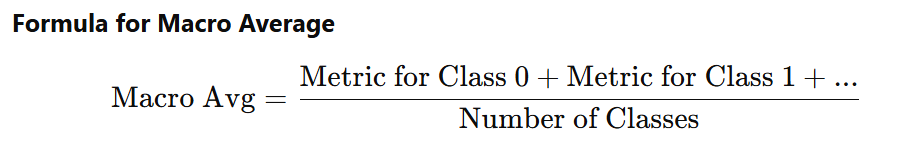

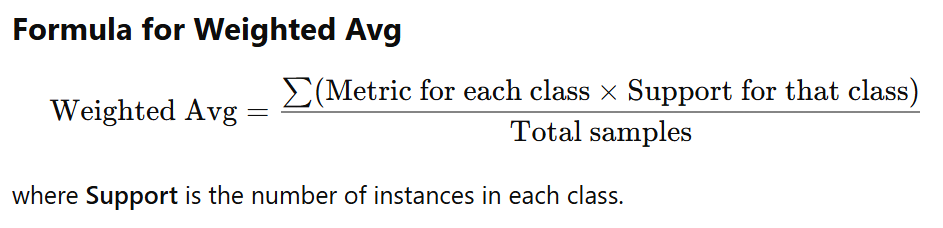

#Macro vs weighted avg:
##What to Look for in a Good Model?
 - Macro Avg and Weighted Avg should be close → Indicates balanced performance across classes.

 - If Macro Avg is much lower than Weighted Avg, the model is likely favoring the majority class and struggling with minority classes.

 - If Weighted Avg is high but Macro Avg is low, the model needs improvement on minority classes.